# Visualizando pontos de GPS no Mapa

Esse Notebook será uma simples demonstração de como plotar pontos de longitude e latitude no mapa com as bibliotecas matplotlib.pyplot, para vizualização gráfica, e o Pandas, para trabalhar com os dados.


# 1.Importação das bibliotecas

Para começar o código, importaremos as duas bibliotecas citadas a cima.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 2. Aquisição de dados

É fundamental a aquisição das coordenadas geográficas para plotar o gráfico, caso contrário, não teria como realizar o gráfico.

## Aplicativo para obter coordenadas geográficas
O aplicativo usado para smartphones é: https://itunes.apple.com/br/app/open-gpx-tracker/id984503772?mt=8.

Para usá-lo é bem simples, basta pressionar start quando iniciar o trajeto, stop para finalizar e ainda é possível colocar waypoints durante o trajeto. Após ter o seu trajeto salvo, basta transformar o arquivo GPX (gerado pelo aplicativo) para um arquivo CSV, onde o mesmo irá conter as informações necessárias para vizualização gráfica.

## Conversor GPX para CSV
Site para conversão: https://mygeodata.cloud/converter/ .

Entrando no site, você deve fazer upload do seu arquivo GPX e selecionar para converter para CSV e baixar. 

# 3. Abertura dos arquivos 

A pasta que contém os arquivos gerados terá um arquivo "track_points.csv", esse que será usado a primeiro momento.

In [4]:
track_points = pd.read_csv('05-Oct-2018-0711/track_points.csv')
print(track_points.head())

#Vamos usar somente longitude e latitude (X, Y)
track_points = track_points.iloc[:, :2]

print(track_points.head())
print("\nmax x", max(track_points['X']))
print("max y", max(track_points['Y']))
print("min x", min(track_points['X']))
print("min y", min(track_points['Y']))

           X          Y  track_fid  track_seg_id  track_seg_point_id  ele  \
0 -48.597092 -27.605192          0             0                   0  5.0   
1 -48.597553 -27.604261          0             0                   1  5.0   
2 -48.598329 -27.602689          0             0                   2  5.0   
3 -48.598456 -27.602432          0             0                   3  5.0   
4 -48.597077 -27.604052          0             0                   4  5.0   

                     time  magvar  geoidheight  name   ...    link2_type  sym  \
0  2018/10/05 09:34:00+00     NaN          NaN   NaN   ...           NaN  NaN   
1  2018/10/05 09:34:01+00     NaN          NaN   NaN   ...           NaN  NaN   
2  2018/10/05 09:34:18+00     NaN          NaN   NaN   ...           NaN  NaN   
3  2018/10/05 09:34:24+00     NaN          NaN   NaN   ...           NaN  NaN   
4  2018/10/05 09:34:36+00     NaN          NaN   NaN   ...           NaN  NaN   

   type  fix  sat  hdop  vdop  pdop  ageofdgpsdata

# 4. Mapa para visualização
Para conseguir o mapa para visualização temos que saber os limites dessa área do mapa, como já sabemos os valores máximos  e mínimos de X e Y, teremos que os limites terão que ser maiores ou iguais para que todos os pontos estejam dentro do mapa.

Site para imagem do mapa: https://www.openstreetmap.org/export#map=14/-27.5946/-48.5497

Site para o editor de fotos online: https://www.befunky.com/pt/recursos/editor-de-fotos/

Os limites do mapa devem ser definidos no canto superior esquerdo, digitando os máximos e mínimos. Após ter sido definida a área, uma areá ficará destacada, sendo essa a ser usada no código. Para salvar a imagem, tire um print e corte em um editor de fotos online com a ferramenta "crop", depois salvar e abrir com o auxílo do pyplot.

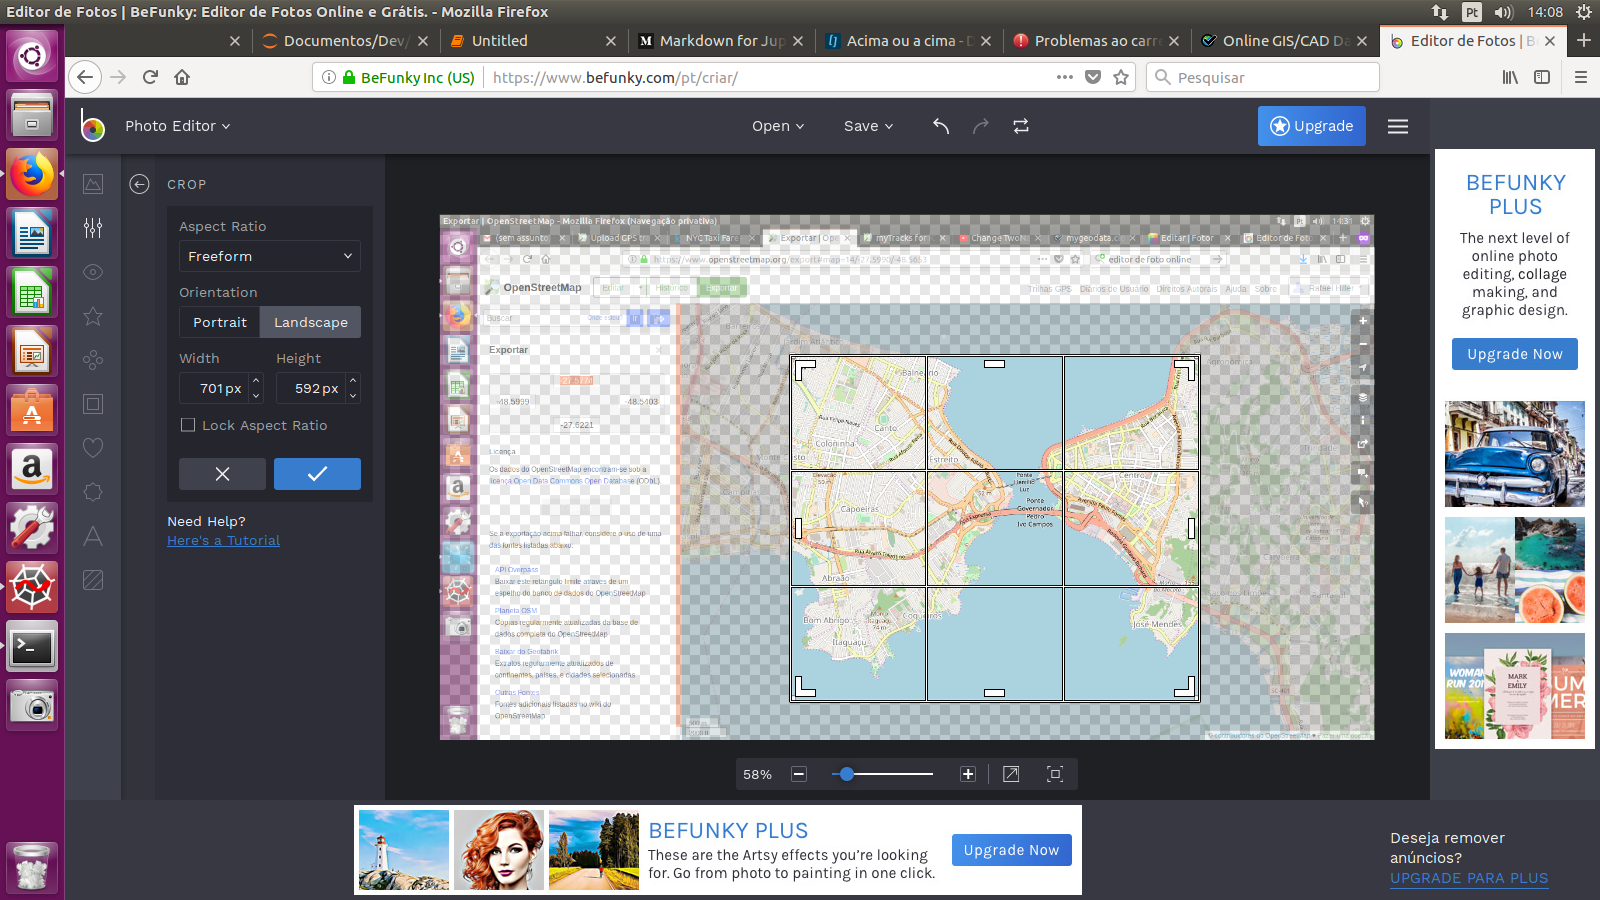

In [5]:
#BB[min_X, max_X, min_Y, max_Y] -> vetor com os limites
BB = [-48.6447, -48.4882, -27.6495, -27.5192]

map_floripa = plt.imread('mapa_de_floripa.jpg')

# 5. Criação do gráfico
Para plotar o gráfico iremos utilizar o `matplotlib.pyplot.scatter`, os limites serão definidos por `pyplot.xlim` e `pyplot.ylim`. A função `pyplot.subplots` será utilizada para definir o tamanho do gráfico.

Documentação das funções usadas:

`pyplot.imshow`: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html 

`pyplot.scatter`: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html


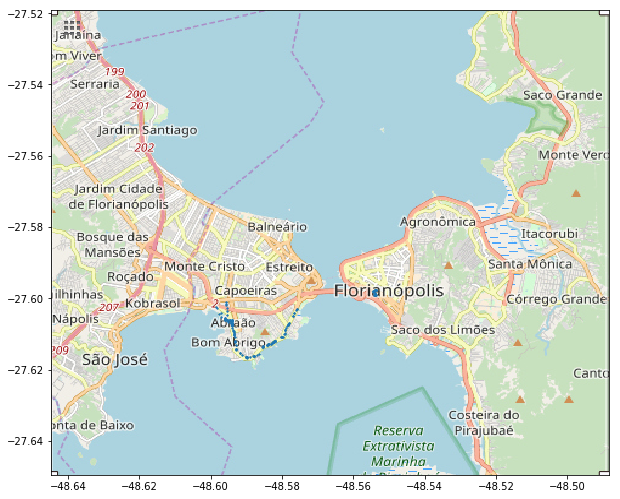

In [6]:
plt.subplots(figsize=(10, 10))
plt.scatter(track_points['X'], track_points['Y'], s=1,  alpha=1)
plt.xlim((BB[0], BB[1]))
plt.ylim((BB[2], BB[3]))
plt.imshow(map_floripa, extent=BB, zorder=0)

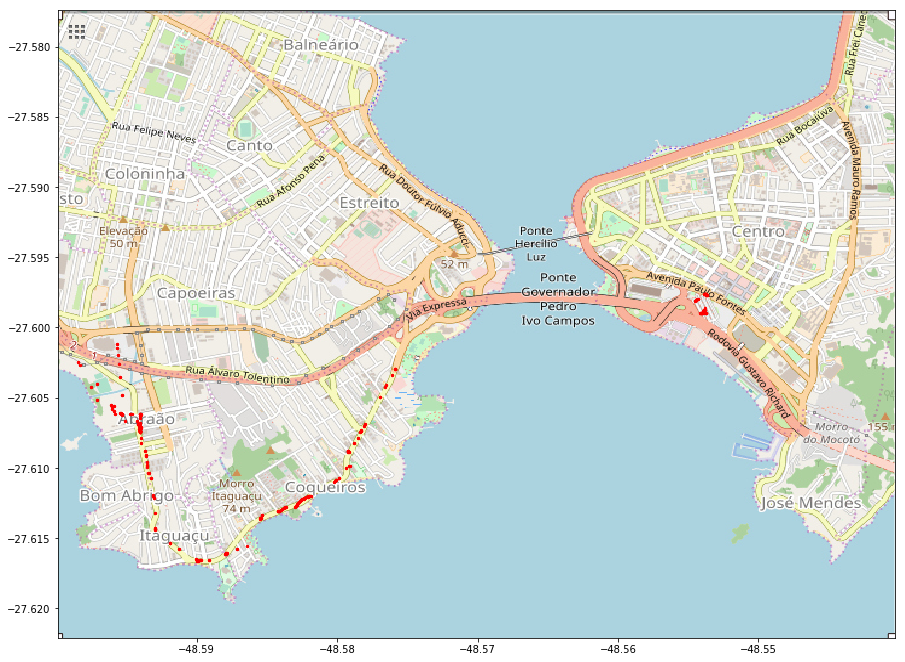

In [7]:
# mapa ampliado
BB_zoom = [-48.5999, -48.5403, -27.6221, -27.5774]
map_floripa_zoom = plt.imread('mapa_floripa_zoom.jpg')

plt.subplots(figsize=(15, 15))
plt.scatter(track_points['X'], track_points['Y'], s=5,  alpha=1, c='r')
plt.xlim((BB_zoom[0], BB_zoom[1]))
plt.ylim((BB_zoom[2], BB_zoom[3]))
plt.imshow(map_floripa_zoom, extent=BB_zoom, zorder=0)

## Calculando a distância entre dois pontos


In [31]:
#x = vetor contendo a latitude e longitude de dois pontos
#x = [x_lon, x_lat, y_lon, y_lat]
#retorno = float distancia

def distance(x):
    dlon = abs(radians(x[0]) - radians(x[2]))
    dlat = abs(radians(x[1]) - radians(x[3]))   
    R = 6373.0

    a = sin(dlat / 2)**2 + cos(radians(x[1])) * cos(radians(x[3])) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance


Agora podemos criar uma coluna para cada ponto pro centro da cidade. 

In [33]:
import numpy as np
from math import sin, cos, sqrt, atan2, radians

ticen = np.array([-27.598574, -48.554065])

dist = track_points
dist['y_lon'] = -27.598574
dist['y_lat'] = -48.554065

print(dist.iloc[:10, 0:5])

dist['distance_ticen'] = dist.iloc[:, 0:5].apply(lambda x: distance(x), axis=1)

print(dist.head())

           X          Y      y_lon      y_lat
0 -48.597092 -27.605192 -27.598574 -48.554065
1 -48.597553 -27.604261 -27.598574 -48.554065
2 -48.598329 -27.602689 -27.598574 -48.554065
3 -48.598456 -27.602432 -27.598574 -48.554065
4 -48.597077 -27.604052 -27.598574 -48.554065
5 -48.595911 -27.605574 -27.598574 -48.554065
6 -48.595077 -27.606664 -27.598574 -48.554065
7 -48.595307 -27.604783 -27.598574 -48.554065
8 -48.595443 -27.603522 -27.598574 -48.554065
9 -48.595540 -27.602625 -27.598574 -48.554065
           X          Y      y_lon      y_lat  distance_ticen
0 -48.597092 -27.605192 -27.598574 -48.554065     2947.423143
1 -48.597553 -27.604261 -27.598574 -48.554065     2947.535009
2 -48.598329 -27.602689 -27.598574 -48.554065     2947.723771
3 -48.598456 -27.602432 -27.598574 -48.554065     2947.754638
4 -48.597077 -27.604052 -27.598574 -48.554065     2947.529757
